 # <p style="background-color:#C71585;font-family:Georgia;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Customer Lifetime Value (CLV) Prediction</b></p>

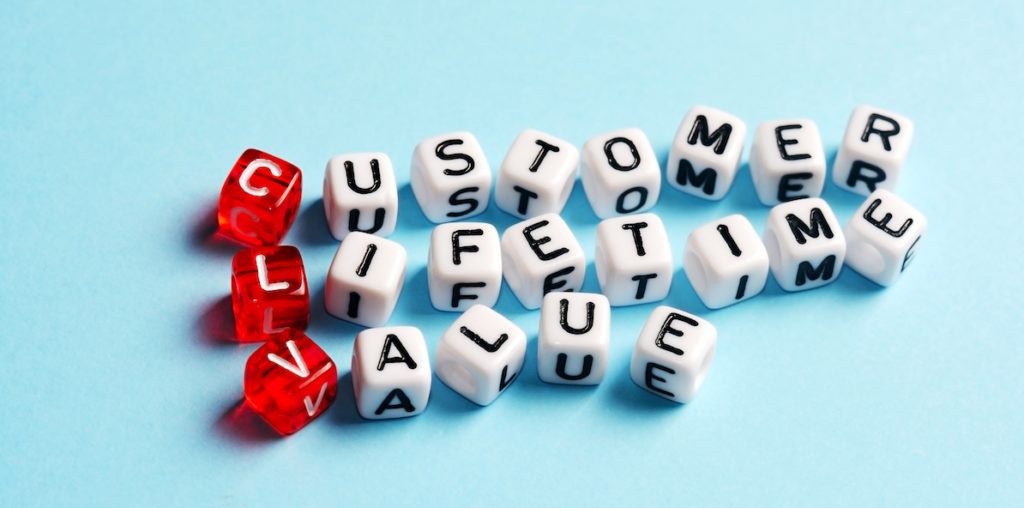

The customer lifetime value (CLV) is a valuable metric that shows the total amount of money a business expects a customer to spend on products and services throughout the customer relationship.

This figure shows businesses where they need to redirect the marketing spend to draw in new customers or retain existing ones.

It puts a numeric value on how valuable a specific customer or segment’s relationship is to the business and how much should be invested in that relationship.

Companies get insights about customers and can create well-informed marketing strategies to achieve their marketing goals and develop loyal customers who advocate for their brand.

In short, it helps focus on the long term profitability of business rather than short term gain so that both business and customers reap benefits.

[Source](https://www.surveysensum.com/customer-experience/customer-lifetime-value/)

In this project, We are going to build some machine learning models that predicts our customers lifetime value.

# <p style="background-color:#C71585;font-family:Georgia;color:white;text-align:left;border-radius:20px 20px;"><b>About Dataset</b></p>

## Context

A real online retail transaction data set of two years:
https://archive.ics.uci.edu/ml/datasets/Online+Retail+II


## Content

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.


## Column Descriptors

InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.

UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).

CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal. The name of the country where a customer resides.

# <p style="background-color:#C71585;font-family:Georgia;color:white;text-align:left;border-radius:20px 20px;"><b>Importing Basic Libraries and Data</b></p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import datetime as dt
from datetime import datetime, timedelta, date

In [2]:
df= pd.read_csv("online_retail_II.csv")
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


# <p style="background-color:#C71585;font-family:Georgia;color:white;text-align:left;border-radius:20px 20px;"><b>Understanding the Dataset (EDA & Data Preprocessing)</b></p>

In [3]:
df.shape

(1067371, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


Checking null data...

In [5]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

Only required features for our analysis:

In [6]:
def drop_columns(df, columns):
    df1= df.drop(columns, axis=1)
    return df1

In [7]:
df1= drop_columns(df, ["Description", "Country"])

In [8]:
df1

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0
...,...,...,...,...,...,...
1067366,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0
1067367,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0
1067368,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0
1067369,581587,22138,3,2011-12-09 12:50:00,4.95,12680.0


In [9]:
df1.isnull().sum()

Invoice             0
StockCode           0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
dtype: int64

In [10]:
#Let's drop the rows containing NaN
df1.dropna(inplace=True)

Checking duplicate rows...

In [11]:
df1[df1.duplicated()]

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID
371,489517,21912,1,2009-12-01 11:34:00,3.75,16329.0
383,489517,22130,6,2009-12-01 11:34:00,0.85,16329.0
384,489517,22319,12,2009-12-01 11:34:00,0.65,16329.0
385,489517,21913,1,2009-12-01 11:34:00,3.75,16329.0
386,489517,21821,1,2009-12-01 11:34:00,3.75,16329.0
...,...,...,...,...,...,...
1067136,581538,22068,1,2011-12-09 11:34:00,0.39,14446.0
1067150,581538,23318,1,2011-12-09 11:34:00,2.49,14446.0
1067153,581538,22992,1,2011-12-09 11:34:00,1.95,14446.0
1067160,581538,22694,1,2011-12-09 11:34:00,2.10,14446.0


let's check any row:

In [12]:
df1.loc[(df1.Invoice=="489517") & (df1.StockCode=="21912")]

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID
363,489517,21912,1,2009-12-01 11:34:00,3.75,16329.0
371,489517,21912,1,2009-12-01 11:34:00,3.75,16329.0
394,489517,21912,1,2009-12-01 11:34:00,3.75,16329.0


In [13]:
len(df1[df1.duplicated()])

26481

There are 26481 duplicate rows, let's drop them:

In [14]:
df1.drop(df1[df1.duplicated()].index, axis=0, inplace=True)

In [15]:
df1.shape

(797883, 6)

In [16]:
# now, no "NULL" and "duplicate" data
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797883 entries, 0 to 1067370
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      797883 non-null  object 
 1   StockCode    797883 non-null  object 
 2   Quantity     797883 non-null  int64  
 3   InvoiceDate  797883 non-null  object 
 4   Price        797883 non-null  float64
 5   Customer ID  797883 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 42.6+ MB


In [17]:
df1.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0


# <p style="background-color:#C71585;font-family:Georgia;color:white;text-align:left;border-radius:20px 20px;"><b>Handling Columns</b></p>

Let's create a new feature: "TotalPrice"

In [18]:
df2= df1.copy()
df2["TotalPrice"] = df2["Quantity"] * df2["Price"]

In [19]:
for i in df2.columns:
    print(i, "column, unique values: ", df2[i].unique())
    print("************")
    print("")

Invoice column, unique values:  ['489434' '489435' '489436' ... '581585' '581586' '581587']
************

StockCode column, unique values:  ['85048' '79323P' '79323W' ... '23562' '23561' '23843']
************

Quantity column, unique values:  [    12     48     24     10     18      3     16      4      2      6
      8      1     28     30     60     32     56      9     25     36
     20    -12     -6     -4    -24     -3     -2    576    288     27
     64    160      5     -1     72     50     54      7    800     11
     58    192     96    144    100    180    216     15    240    108
     33     90     81    -81    -48     17     -5     40     -8     -9
     13     21    120    200    168     19    280    128   -150    -18
    -23     80    300    450     14     61    480     -7     46    504
     45   4320   5184   4008     22    600    505    500     23     47
    432    252     75    -16   -504   -600   -252   -246    -36    360
    107     49     42     66    -10     34     

In [20]:
for i in df2.columns:
    print(i, "column, unique values: ", df2[i].nunique())
    print("************")
    print("")

Invoice column, unique values:  44876
************

StockCode column, unique values:  4646
************

Quantity column, unique values:  643
************

InvoiceDate column, unique values:  41439
************

Price column, unique values:  1022
************

Customer ID column, unique values:  5942
************

TotalPrice column, unique values:  5625
************



Observed some negative values the Quantity and Price columns.
Let's check the value containing 0 in the Quantity and Price columns:

In [21]:
df2.shape

(797883, 7)

In [22]:
df2.loc[(df2["Quantity"]<=0) | (df2["Price"]<=0)]

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,TotalPrice
178,C489449,22087,-12,2009-12-01 10:33:00,2.95,16321.0,-35.40
179,C489449,85206A,-6,2009-12-01 10:33:00,1.65,16321.0,-9.90
180,C489449,21895,-4,2009-12-01 10:33:00,4.25,16321.0,-17.00
181,C489449,21896,-6,2009-12-01 10:33:00,2.10,16321.0,-12.60
182,C489449,22083,-12,2009-12-01 10:33:00,2.95,16321.0,-35.40
...,...,...,...,...,...,...,...
1065910,C581490,23144,-11,2011-12-09 09:57:00,0.83,14397.0,-9.13
1067002,C581499,M,-1,2011-12-09 10:28:00,224.69,15498.0,-224.69
1067176,C581568,21258,-5,2011-12-09 11:57:00,10.95,15311.0,-54.75
1067177,C581569,84978,-1,2011-12-09 11:58:00,1.25,17315.0,-1.25


Let's drop them...

In [23]:
df3= df2[(df2['Price'] > 0)]

In [24]:
df3= df3[(df3['Quantity'] > 0)]

In [25]:
df2.shape

(797883, 7)

In [26]:
df3.shape

(779423, 7)

In [27]:
df3.loc[(df3["Quantity"]<=0) | (df3["Price"]<=0)]

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,TotalPrice


Let's find the non-numeric stock codes:

In [28]:
# ALL ONLY non-numeric stock codes
wrong_stock_codes= df3[df3["StockCode"].astype(str).str.contains(r"^[a-zA-Z''-'\s]{1,40}$")]["StockCode"].unique().tolist()

df3[df3["StockCode"].isin(wrong_stock_codes)].groupby(["StockCode"]).agg({"StockCode": "count"})

,StockCode
StockCode,
ADJUST,32
BANK CHARGES,31
D,5
DOT,16
M,681
PADS,17
POST,1803


In [29]:
df3[df3["StockCode"].isin(wrong_stock_codes)].groupby(["StockCode"]).agg({"StockCode": "count"}).sum()

StockCode    2585
dtype: int64

Total rows: 2585

Let's drop them:

In [30]:
df3= df3[~df3["StockCode"].isin(wrong_stock_codes)].reset_index(drop=True)

In [31]:
# Other non-numeric stock codes
wrong_stock_codes2= df3[df3["StockCode"].astype(str).str.contains(r"[a-zA-Z]{3,}")]["StockCode"].unique().tolist()
df3[df3["StockCode"].isin(wrong_stock_codes2)].groupby(["StockCode"]).agg({"StockCode": "count"})

,StockCode
StockCode,
ADJUST2,3
TEST001,9
TEST002,1


In [32]:
df3[df3["StockCode"].isin(wrong_stock_codes2)].groupby(["StockCode"]).agg({"StockCode": "count"}).sum()

StockCode    13
dtype: int64

Let's drop them:

In [33]:
df3= df3[~df3["StockCode"].isin(wrong_stock_codes2)].reset_index(drop=True)

In [34]:
df3

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,TotalPrice
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0,83.40
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0,81.00
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0,81.00
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0,100.80
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0,30.00
...,...,...,...,...,...,...,...
776820,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,10.20
776821,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,12.60
776822,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,16.60
776823,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,16.60


In [35]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776825 entries, 0 to 776824
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      776825 non-null  object 
 1   StockCode    776825 non-null  object 
 2   Quantity     776825 non-null  int64  
 3   InvoiceDate  776825 non-null  object 
 4   Price        776825 non-null  float64
 5   Customer ID  776825 non-null  float64
 6   TotalPrice   776825 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 41.5+ MB


Let's convert the type of column "InvoiceDate" to pandas datetime

In [36]:
df3.InvoiceDate = pd.to_datetime(df3.InvoiceDate)

Let's convert the "Customer ID" column to a categorical column:

In [37]:
df3["Customer ID"]= df3["Customer ID"].astype('object')

In [38]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776825 entries, 0 to 776824
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      776825 non-null  object        
 1   StockCode    776825 non-null  object        
 2   Quantity     776825 non-null  int64         
 3   InvoiceDate  776825 non-null  datetime64[ns]
 4   Price        776825 non-null  float64       
 5   Customer ID  776825 non-null  object        
 6   TotalPrice   776825 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 41.5+ MB


# <p style="background-color:#C71585;font-family:Georgia;color:white;text-align:left;border-radius:20px 20px;"><b>Lifetime Value Prediction</b></p>

Yes, we are ready to predict LTV.

We will use 8 months of data, calculate RFM and use it for predicting next 16 months.

We were inspired by [Karaman's project](https://towardsdatascience.com/data-driven-growth-with-python-part-3-customer-lifetime-value-prediction-6017802f2e0f)

In [39]:
df_LTV= df3.copy()

In [40]:
print("First date in dataset: ", df_LTV['InvoiceDate'].min())

First date in dataset:  2009-12-01 07:45:00


In [41]:
print("Last date in dataset: ", df_LTV['InvoiceDate'].max())

Last date in dataset:  2011-12-09 12:50:00


create 2 dataframes:

In [42]:
df_last= df_LTV[(df_LTV.InvoiceDate >=  datetime.strptime("2010-8-1", '%Y-%m-%d')) & (df_LTV.InvoiceDate <= df_LTV['InvoiceDate'].max())].reset_index(drop=True)

In [43]:
df_first= df_LTV[(df_LTV.InvoiceDate <  datetime.strptime("2010-8-1", '%Y-%m-%d')) & (df_LTV.InvoiceDate >= df_LTV['InvoiceDate'].min())].reset_index(drop=True)

In [44]:
df_last

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,TotalPrice
0,517707,22066,2,2010-08-01 10:06:00,1.45,12843.0,2.90
1,517707,21889,1,2010-08-01 10:06:00,1.25,12843.0,1.25
2,517708,22415,2,2010-08-01 10:09:00,7.95,17243.0,15.90
3,517708,22470,4,2010-08-01 10:09:00,2.95,17243.0,11.80
4,517708,22483,2,2010-08-01 10:09:00,2.95,17243.0,5.90
...,...,...,...,...,...,...,...
558575,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,10.20
558576,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,12.60
558577,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,16.60
558578,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,16.60


In [45]:
df_first

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,TotalPrice
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0,83.40
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0,81.00
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0,81.00
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0,100.80
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0,30.00
...,...,...,...,...,...,...,...
218240,517704,22659,6,2010-07-30 17:08:00,1.95,14031.0,11.70
218241,517704,21658,3,2010-07-30 17:08:00,3.95,14031.0,11.85
218242,517704,22328,8,2010-07-30 17:08:00,2.95,14031.0,23.60
218243,517704,37370,72,2010-07-30 17:08:00,1.06,14031.0,76.32


I will create my RFM scoring (I won’t go over the details of RFM scoring, <a href="https://www.kaggle.com/code/yaseminturker/customer-segmentation-with-rfm-kmeans-and-hier#Model-Tuning" target="_blank" rel="noopener noreferrer">please see my previous project</a>):

In [46]:
RFM_df= pd.DataFrame(df_first['Customer ID'].unique())
RFM_df.columns = ['Customer ID']
RFM_df

,Customer ID
0,13085.0
1,13078.0
2,15362.0
3,18102.0
4,12682.0
...,...
3132,14346.0
3133,16428.0
3134,17109.0
3135,17735.0


for Recency:

In [47]:
recency_df= df_first.groupby('Customer ID')['InvoiceDate'].max().reset_index()
recency_df

,Customer ID,InvoiceDate
0,12346.0,2010-06-28 13:53:00
1,12349.0,2010-04-29 13:20:00
2,12355.0,2010-05-21 11:59:00
3,12358.0,2010-06-07 12:28:00
4,12359.0,2010-06-22 10:24:00
...,...,...
3132,18281.0,2010-05-11 10:49:00
3133,18283.0,2010-03-28 13:21:00
3134,18285.0,2010-02-17 10:24:00
3135,18286.0,2009-12-16 10:45:00


In [48]:
last_day_df_first= df_first['InvoiceDate'].max()
last_day_df_first

Timestamp('2010-07-30 17:08:00')

In [49]:
recency_df['Recency']= recency_df['InvoiceDate'].apply(lambda x: (last_day_df_first - x).days)
recency_df

,Customer ID,InvoiceDate,Recency
0,12346.0,2010-06-28 13:53:00,32
1,12349.0,2010-04-29 13:20:00,92
2,12355.0,2010-05-21 11:59:00,70
3,12358.0,2010-06-07 12:28:00,53
4,12359.0,2010-06-22 10:24:00,38
...,...,...,...
3132,18281.0,2010-05-11 10:49:00,80
3133,18283.0,2010-03-28 13:21:00,124
3134,18285.0,2010-02-17 10:24:00,163
3135,18286.0,2009-12-16 10:45:00,226


In [50]:
RFM_df= pd.merge(RFM_df, recency_df[['Customer ID','Recency']], on='Customer ID')
RFM_df

,Customer ID,Recency
0,13085.0,182
1,13078.0,3
2,15362.0,241
3,18102.0,0
4,12682.0,15
...,...,...
3132,14346.0,0
3133,16428.0,0
3134,17109.0,0
3135,17735.0,0


In [51]:
#order cluster method
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

Build 4 clusters for recency and add it to dataframe:

In [52]:
from sklearn.cluster import KMeans

In [53]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(RFM_df[['Recency']])
RFM_df['RecencyCluster'] = kmeans.predict(RFM_df[['Recency']])
RFM_df

,Customer ID,Recency,RecencyCluster
0,13085.0,182,3
1,13078.0,3,0
2,15362.0,241,3
3,18102.0,0,0
4,12682.0,15,0
...,...,...,...
3132,14346.0,0,0
3133,16428.0,0,0
3134,17109.0,0,0
3135,17735.0,0,0


In [54]:
RFM_df= order_cluster('RecencyCluster', 'Recency', RFM_df, False)
RFM_df

,Customer ID,Recency,RecencyCluster
0,13085.0,182,0
1,15362.0,241,0
2,13635.0,227,0
3,15413.0,194,0
4,17592.0,241,0
...,...,...,...
3132,16007.0,46,2
3133,15817.0,46,2
3134,16500.0,46,2
3135,15905.0,46,2


In [55]:
RecencyCluster_Stats = RFM_df.groupby("RecencyCluster")["Recency"].describe()
RecencyCluster_Stats

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,348.0,212.614943,23.444115,175.0,187.0,225.0,233.25,241.0
1,587.0,136.025554,19.060288,105.0,121.0,134.0,151.00,173.0
2,918.0,72.257081,17.074388,46.0,56.0,72.0,86.00,103.0
3,1284.0,19.242991,13.650412,0.0,7.0,17.0,31.00,45.0


for Frequency:

In [56]:
frequency_df= df_first.groupby(["Customer ID"]).agg({"Invoice":"nunique"}).reset_index()
frequency_df.rename(columns={"Invoice":"Frequency"}, inplace=True)
frequency_df

,Customer ID,Frequency
0,12346.0,2
1,12349.0,1
2,12355.0,1
3,12358.0,2
4,12359.0,5
...,...,...
3132,18281.0,1
3133,18283.0,3
3134,18285.0,1
3135,18286.0,1


In [57]:
RFM_df= pd.merge(RFM_df, frequency_df, on='Customer ID')
RFM_df

,Customer ID,Recency,RecencyCluster,Frequency
0,13085.0,182,0,6
1,15362.0,241,0,1
2,13635.0,227,0,2
3,15413.0,194,0,5
4,17592.0,241,0,1
...,...,...,...,...
3132,16007.0,46,2,1
3133,15817.0,46,2,1
3134,16500.0,46,2,1
3135,15905.0,46,2,1


In [58]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(RFM_df[['Frequency']])
RFM_df['FrequencyCluster'] = kmeans.predict(RFM_df[['Frequency']])
RFM_df

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster
0,13085.0,182,0,6,3
1,15362.0,241,0,1,0
2,13635.0,227,0,2,0
3,15413.0,194,0,5,3
4,17592.0,241,0,1,0
...,...,...,...,...,...
3132,16007.0,46,2,1,0
3133,15817.0,46,2,1,0
3134,16500.0,46,2,1,0
3135,15905.0,46,2,1,0


In [59]:
RFM_df= order_cluster('FrequencyCluster', 'Frequency', RFM_df, True)
RFM_df

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster
0,13085.0,182,0,6,1
1,15413.0,194,0,5,1
2,14063.0,189,0,7,1
3,17519.0,22,3,8,1
4,17238.0,25,3,9,1
...,...,...,...,...,...
3132,14606.0,1,3,62,3
3133,13694.0,0,3,81,3
3134,12748.0,2,3,56,3
3135,17850.0,11,3,81,3


In [60]:
FrequencyCluster_Stats= RFM_df.groupby("FrequencyCluster")["Frequency"].describe()
FrequencyCluster_Stats

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,2546.0,1.844855,1.012247,1.0,1.0,1.0,2.0,4.0
1,511.0,7.107632,2.234787,5.0,5.0,6.0,8.0,13.0
2,65.0,20.661538,6.671481,14.0,16.0,18.0,24.0,40.0
3,15.0,60.600000,14.759017,41.0,49.0,58.0,70.0,88.0


for Monetary:

In [61]:
monetary_df= df_first.groupby('Customer ID')['TotalPrice'].sum().reset_index()
monetary_df.columns = ['Customer ID', 'Monetary']
monetary_df.head()

,Customer ID,Monetary
0,12346.0,169.36
1,12349.0,1068.52
2,12355.0,488.21
3,12358.0,1697.93
4,12359.0,2012.03


In [62]:
RFM_df= pd.merge(RFM_df, monetary_df, on='Customer ID')
RFM_df

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary
0,13085.0,182,0,6,1,2017.20
1,15413.0,194,0,5,1,6798.72
2,14063.0,189,0,7,1,9471.50
3,17519.0,22,3,8,1,2621.31
4,17238.0,25,3,9,1,2223.03
...,...,...,...,...,...,...
3132,14606.0,1,3,62,3,12085.93
3133,13694.0,0,3,81,3,106707.71
3134,12748.0,2,3,56,3,7670.00
3135,17850.0,11,3,81,3,36066.05


In [63]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(RFM_df[['Monetary']])
RFM_df['MonetaryCluster']= kmeans.predict(RFM_df[['Monetary']])
RFM_df

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster
0,13085.0,182,0,6,1,2017.20,0
1,15413.0,194,0,5,1,6798.72,0
2,14063.0,189,0,7,1,9471.50,0
3,17519.0,22,3,8,1,2621.31,0
4,17238.0,25,3,9,1,2223.03,0
...,...,...,...,...,...,...,...
3132,14606.0,1,3,62,3,12085.93,0
3133,13694.0,0,3,81,3,106707.71,1
3134,12748.0,2,3,56,3,7670.00,0
3135,17850.0,11,3,81,3,36066.05,2


In [64]:
RFM_df= order_cluster('MonetaryCluster', 'Monetary', RFM_df, True)
RFM_df

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster
0,13085.0,182,0,6,1,2017.20,0
1,15413.0,194,0,5,1,6798.72,0
2,14063.0,189,0,7,1,9471.50,0
3,17519.0,22,3,8,1,2621.31,0
4,17238.0,25,3,9,1,2223.03,0
...,...,...,...,...,...,...,...
3132,17448.0,32,3,41,3,14448.67,1
3133,14646.0,8,3,38,2,132690.81,2
3134,14156.0,5,3,51,3,135980.33,2
3135,13694.0,0,3,81,3,106707.71,2


In [65]:
MonetaryCluster_Stats= RFM_df.groupby("MonetaryCluster")["Monetary"].describe()
MonetaryCluster_Stats

,count,mean,std,min,25%,50%,75%,max
MonetaryCluster,,,,,,,,
0,3099.0,1070.028261,1477.097908,1.55,256.4100,561.25,1256.15,12916.15
1,34.0,25074.632353,12736.899487,13776.74,15635.6675,19927.71,30937.89,69700.34
2,3.0,125126.283333,16035.526751,106707.71,119699.2600,132690.81,134335.57,135980.33
3,1.0,222525.280000,NaN,222525.28,222525.2800,222525.28,222525.28,222525.28


Let's calculate Overall Scores:

- 0 to 2: Low Value
- 3 to 4: Mid Value
- 5+: High Value

In [66]:
#overall scoring
RFM_df['OverallScore'] = RFM_df['RecencyCluster'] + RFM_df['FrequencyCluster'] + RFM_df['MonetaryCluster']
RFM_df['Segment'] = 'Low-Value'
RFM_df.loc[RFM_df['OverallScore']>2,'Segment'] = 'Mid-Value' 
RFM_df.loc[RFM_df['OverallScore']>4,'Segment'] = 'High-Value'
RFM_df

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,Segment
0,13085.0,182,0,6,1,2017.20,0,1,Low-Value
1,15413.0,194,0,5,1,6798.72,0,1,Low-Value
2,14063.0,189,0,7,1,9471.50,0,1,Low-Value
3,17519.0,22,3,8,1,2621.31,0,4,Mid-Value
4,17238.0,25,3,9,1,2223.03,0,4,Mid-Value
...,...,...,...,...,...,...,...,...,...
3132,17448.0,32,3,41,3,14448.67,1,7,High-Value
3133,14646.0,8,3,38,2,132690.81,2,7,High-Value
3134,14156.0,5,3,51,3,135980.33,2,8,High-Value
3135,13694.0,0,3,81,3,106707.71,2,8,High-Value


In [67]:
RFM_df.groupby('OverallScore')['Recency','Frequency','Monetary'].mean()

,Recency,Frequency,Monetary
OverallScore,,,
0,212.826087,1.214493,347.085971
1,136.576389,1.532986,555.628090
2,73.718750,1.960337,727.216106
3,26.388950,2.724862,1049.357326
4,17.170051,7.307107,2714.565431
5,10.722222,18.129630,7923.056667
6,8.444444,30.055556,20951.192778
7,6.700000,59.000000,43224.196000
8,2.500000,66.000000,121344.020000


Our feature set is ready, let’s calculate 16 months CLV for each customer which we are going to use for training our model.

There is no cost specified in the dataset. That’s why Monetary becomes our CLV directly:

In [68]:
monetary_df_last= df_last.groupby('Customer ID')['TotalPrice'].sum().reset_index()
monetary_df_last.columns = ['Customer ID', 'lastMonthsMonetary']
monetary_df_last['Customer ID']= monetary_df_last['Customer ID'].astype("object")
monetary_df_last.head()

,Customer ID,lastMonthsMonetary
0,12346.0,77183.60
1,12347.0,4921.53
2,12348.0,1658.40
3,12349.0,2610.17
4,12350.0,294.40


In [69]:
monetary_df_last= monetary_df_last[monetary_df_last["lastMonthsMonetary"] <= monetary_df_last["lastMonthsMonetary"].quantile(0.99)]

In [70]:
monetary_df_last.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5105 entries, 1 to 5156
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         5105 non-null   object 
 1   lastMonthsMonetary  5105 non-null   float64
dtypes: float64(1), object(1)
memory usage: 119.6+ KB


Let's merge our 8 months and 16 months dataframes to see the feature set we have:

In [71]:
RFM_df_NEW = pd.merge(RFM_df, monetary_df_last, on='Customer ID', how='left')
RFM_df_NEW = RFM_df_NEW.fillna(0)
RFM_df_NEW['Customer ID']= RFM_df_NEW['Customer ID'].astype("object")
RFM_df_NEW

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,Segment,lastMonthsMonetary
0,13085.0,182,0,6,1,2017.20,0,1,Low-Value,416.08
1,15413.0,194,0,5,1,6798.72,0,1,Low-Value,0.00
2,14063.0,189,0,7,1,9471.50,0,1,Low-Value,0.00
3,17519.0,22,3,8,1,2621.31,0,4,Mid-Value,2152.86
4,17238.0,25,3,9,1,2223.03,0,4,Mid-Value,5108.14
...,...,...,...,...,...,...,...,...,...,...
3132,17448.0,32,3,41,3,14448.67,1,7,High-Value,0.00
3133,14646.0,8,3,38,2,132690.81,2,7,High-Value,0.00
3134,14156.0,5,3,51,3,135980.33,2,8,High-Value,0.00
3135,13694.0,0,3,81,3,106707.71,2,8,High-Value,0.00


In [72]:
RFM_df_NEW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3137 entries, 0 to 3136
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         3137 non-null   object 
 1   Recency             3137 non-null   int64  
 2   RecencyCluster      3137 non-null   int64  
 3   Frequency           3137 non-null   int64  
 4   FrequencyCluster    3137 non-null   int64  
 5   Monetary            3137 non-null   float64
 6   MonetaryCluster     3137 non-null   int64  
 7   OverallScore        3137 non-null   int64  
 8   Segment             3137 non-null   object 
 9   lastMonthsMonetary  3137 non-null   float64
dtypes: float64(2), int64(6), object(2)
memory usage: 269.6+ KB


Here, we want to create CLV segments. Because it makes it more actionable and easy to communicate with other people. 

By applying K-means clustering, we can identify our existing CLV groups and build segments on top of it.

Considering business part of this analysis, we need to treat customers differently based on their predicted CLV. 

For this example, we will apply clustering and have 3 segments (number of segments really depends on your business dynamics and goals):

- Low CLV
- Mid CLV
- High CLV

We are going to apply K-means clustering to decide segments and observe their characteristics:

In [73]:
#creating 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(RFM_df_NEW[['lastMonthsMonetary']])
RFM_df_NEW['LTVCluster'] = kmeans.predict(RFM_df_NEW[['lastMonthsMonetary']])

In [74]:
RFM_df_NEW = order_cluster('LTVCluster', 'lastMonthsMonetary', RFM_df_NEW, True)
RFM_df_NEW

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,Segment,lastMonthsMonetary,LTVCluster
0,13085.0,182,0,6,1,2017.20,0,1,Low-Value,416.08,0
1,15413.0,194,0,5,1,6798.72,0,1,Low-Value,0.00,0
2,14063.0,189,0,7,1,9471.50,0,1,Low-Value,0.00,0
3,17519.0,22,3,8,1,2621.31,0,4,Mid-Value,2152.86,0
4,17742.0,25,3,6,1,1240.04,0,4,Mid-Value,858.44,0
...,...,...,...,...,...,...,...,...,...,...,...
3132,12709.0,4,3,13,1,16536.40,1,5,High-Value,12950.78,2
3133,16779.0,1,3,25,2,19195.89,1,6,High-Value,13613.14,2
3134,16754.0,30,3,24,2,46631.47,1,6,High-Value,18868.60,2
3135,14527.0,2,3,47,3,16021.55,1,7,High-Value,11169.55,2


In [75]:
#creating a new cluster dataframe
df_LTVCluster = RFM_df_NEW.copy()
df_LTVCluster.groupby('LTVCluster')['lastMonthsMonetary'].describe()

,count,mean,std,min,25%,50%,75%,max
LTVCluster,,,,,,,,
0,2467.0,644.062793,709.641174,0.00,0.0000,395.950,1051.9050,2610.17
1,544.0,4576.775129,1589.190147,2625.62,3222.9575,4079.940,5615.3200,8548.72
2,126.0,12686.642063,3365.669323,8747.39,9858.1050,11778.785,14804.8575,23068.77


We have finished CLV clustering.

2 is the best with average 12686 CLV whereas 0 is the worst with 644.

# <p style="background-color:#C71585;font-family:Georgia;color:white;text-align:left;border-radius:20px 20px;"><b>Building Machine Learning Model</b></p>


We will start to build ML model. Now, we should perform some steps (some feature engineering, split data, etc.)

In [76]:
df_ML= df_LTVCluster.copy()

In [77]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3137 entries, 0 to 3136
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         3137 non-null   object 
 1   Recency             3137 non-null   int64  
 2   RecencyCluster      3137 non-null   int64  
 3   Frequency           3137 non-null   int64  
 4   FrequencyCluster    3137 non-null   int64  
 5   Monetary            3137 non-null   float64
 6   MonetaryCluster     3137 non-null   int64  
 7   OverallScore        3137 non-null   int64  
 8   Segment             3137 non-null   object 
 9   lastMonthsMonetary  3137 non-null   float64
 10  LTVCluster          3137 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 294.1+ KB


lets convert columns which we thought to be categorical column into a categorical column:

In [78]:
for i in ["Customer ID","RecencyCluster","FrequencyCluster", "MonetaryCluster", "Segment", "LTVCluster"]:
    df_ML[i]= df_ML[i].astype('object')

Numerical columns:

In [79]:
Num= df_ML.select_dtypes(exclude='object').columns.tolist()
Num

['Recency', 'Frequency', 'Monetary', 'OverallScore', 'lastMonthsMonetary']

Let's apply StandardScaler for numerical columns:

In [80]:
from sklearn.preprocessing import StandardScaler
scalerNum= StandardScaler()

for cols in Num:
    df_ML[cols] = scalerNum.fit_transform(df_ML[[cols]])

Categorical columns:

In [81]:
Cat= df_ML.select_dtypes(include='object').columns.tolist()
Cat

['Customer ID',
 'RecencyCluster',
 'FrequencyCluster',
 'MonetaryCluster',
 'Segment',
 'LTVCluster']

Convert categorical columns to numerical by using LabelEncoder:

In [82]:
from sklearn.preprocessing import LabelEncoder
df_ML = df_ML.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)
df_ML.head()

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,Segment,lastMonthsMonetary,LTVCluster
0,350,1.575357,0,0.483320,1,0.078294,0,-0.938497,1,-0.479931,0
1,1598,1.757235,0,0.299341,1,0.830381,0,-0.938497,1,-0.623214,0
2,872,1.681452,0,0.667300,1,1.250784,0,-0.938497,1,-0.623214,0
3,2728,-0.849689,3,0.851280,1,0.173315,0,1.345495,2,0.118155,0
4,2850,-0.804219,3,0.483320,1,-0.043946,0,1.345495,2,-0.327597,0


Create X and y, X will be feature set and y is the label - CLV:

In [83]:
X = df_ML.drop(['LTVCluster','lastMonthsMonetary'], axis=1)
y = df_ML['LTVCluster']

split training and test sets

In [84]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [86]:
models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Random Forest' : RandomForestClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier(),
    'XG Boosting' : xgb.XGBClassifier()
}

In [87]:
%%time
for name, model in models.items():
    print(f'{name} training started')
    model.fit(X_train, y_train)
    print(f'{name} trained')
    print("*"*40)
print("FINISHED")

K-Nearest Neighbors training started
K-Nearest Neighbors trained
****************************************
Logistic Regression training started
Logistic Regression trained
****************************************
Random Forest training started
Random Forest trained
****************************************
Gradient Boosting training started
Gradient Boosting trained
****************************************
XG Boosting training started
XG Boosting trained
****************************************
FINISHED
CPU times: total: 4.47 s
Wall time: 2.91 s


In [88]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification

In [89]:
for name in models:
    acc_score= round(accuracy_score(y_test, models.get(name).predict(X_test)), 3)
    print(f'{name} accuracy score :  {acc_score}')

K-Nearest Neighbors accuracy score :  0.763
Logistic Regression accuracy score :  0.792
Random Forest accuracy score :  0.813
Gradient Boosting accuracy score :  0.817
XG Boosting accuracy score :  0.804


Best accuracy shows 82% on the test set. Looks really good. Or does it?

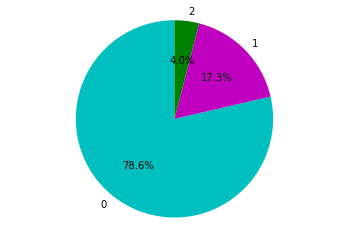

In [90]:
labels= df_LTVCluster.groupby('LTVCluster')['lastMonthsMonetary'].describe().index
colors=['c', 'm', 'g']
sizes= df_LTVCluster.groupby('LTVCluster')['lastMonthsMonetary'].describe()["count"]
LTVCluster_Pie= plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

Biggest cluster we have is cluster 0 which is 78.6% of the total base. If we blindly say, every customer belongs to cluster 0, then our accuracy would be 78.6%.

82% vs 78.6% tell us that our machine learning model is a useful one but needs some improvement for sure. We should find out where the model is failing.

We can identify that by looking at classification report:

In [91]:
for name in models:
    print(f'{name} classification report')
    print("-------------------------------")
    print(classification_report(y_test, models.get(name).predict(X_test)))
    print("******************************")
    print(" ")

K-Nearest Neighbors classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       819
           1       0.20      0.06      0.09       170
           2       0.00      0.00      0.00        47

    accuracy                           0.76      1036
   macro avg       0.33      0.34      0.32      1036
weighted avg       0.66      0.76      0.70      1036

******************************
 
Logistic Regression classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       819
           1       0.42      0.08      0.14       170
           2       0.50      0.02      0.04        47

    accuracy                           0.79      1036
   macro avg       0.58      0.36      0.35      1036
weighted avg       0.73      0.79      0.72      1036

******************************
 
Random Forest classifica

As we handle the Gradient Boosting model;

Precision and recall are acceptable for 0.

As an example, for cluster 0 (Low CLV), if model tells us this customer belongs to cluster 0,87 out of 100 will be correct (precision). And the model successfully identifies 95% of actual cluster 0 customers (recall).

We really need to improve the model for other clusters. For example, this model can not detect other class CLV customers. Possible actions to improve those points:

- Adding more features and improve feature engineering
- Apply hyper parameter tuning to current model
- Add more data to the model if possible

<div style="color:white; font-size:125%; text-align:left; display:fill; border-radius:5px; background-color:#C71585; overflow:hidden">Thanks for reading. I hope you enjoy it and that it was helpful to you.<br>Please don't forget to follow me and give an upvote on</br>
👇👇👇
</div>

**<a href="https://www.kaggle.com/yaseminturker/" target="_blank" rel="noopener noreferrer">[Kaggle]</a> | 
<a href="https://github.com/yaseminturker" target="_blank" rel="noopener noreferrer">[GitHub]</a> |
<a href="https://www.linkedin.com/in/yasemin-turker/" target="_blank" rel="noopener noreferrer">[Linkedin]</a>**